# Machine Learning

## Linear Regression models

### Jorge de Toro, Juan A. Ortíz

Una vez realizado el estudio por día, 
vemos que no es demasiado fiable debido a la variación que existe si cambia un día de sábado a domingo o lunes.
Por lo tanto, vamos a realizar el estudio agrupando las ventas por mes y haciendo una previsión a mes vista.
Asimismo, de cara al año 2020 vemos que debido a la pandemia las ventas se incrementan de manera considerable al no ser un año normal. Por lo que, vamos a sacar los datos de 2017, y tener como conjunto de datos de 2017 a 2019.

### Predicción series temporales by month

#### Estacionalidad de la serie
Aunque se observaba estacionalidad al ver la tabla por día, es díficil de ver en un gráfico. Lo agruparemos por meses para estudiarlo más a fondo.


In [3]:
# Importamos todos los módulos necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

#modelos Regresión Lineal y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#medidas de error
from sklearn.metrics import mean_squared_error, confusion_matrix
from math import sqrt

In [4]:
df =pd.DataFrame()
df = pd.read_csv('C:/Users/jorge/El Corte Inglés, S.A/Otb y el master - Documentos/VentaMes2017-2019.csv'
                 ,';',index_col='Fecha Venta',parse_dates=True)

In [5]:
#Convertimos el índice en fecha
df.index = pd.to_datetime(df.index)
print(df.head())
df.info()

#df['Año'] = df.index.year
#df['Mes'] = df.index.month
#df['Dia'] = df.index.day_name()
#df['Semana'] =df.index.week

             Unidades Vendidas
Fecha Venta                   
2017-01-01               94158
2017-02-01               30152
2017-03-01               38901
2017-04-01               58229
2017-05-01               59880
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2017-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unidades Vendidas  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


<AxesSubplot:xlabel='Fecha Venta'>

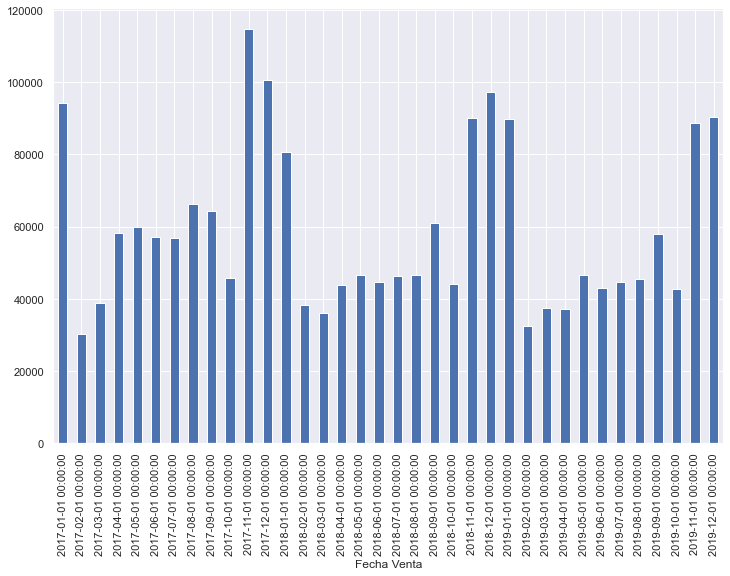

In [6]:
sbn.set(rc={'figure.figsize':(10, 5)})
df['Unidades Vendidas'].plot(figsize=(12,8),kind='bar')
#ax = df['Unidades Vendidas'].plot(marker='.', alpha=0.1, linestyle='None', figsize=(10,10), subplots=True)

In [7]:
df['Sale_LastMonth'] = df['Unidades Vendidas'].shift(+1)
df['Sale_2Monthsback'] = df['Unidades Vendidas'].shift(+2)
df['Sale_3Monthsback'] = df['Unidades Vendidas'].shift(+3)
df.head(10)

,Unidades Vendidas,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Fecha Venta,,,,
2017-01-01,94158,NaN,NaN,NaN
2017-02-01,30152,94158.0,NaN,NaN
2017-03-01,38901,30152.0,94158.0,NaN
2017-04-01,58229,38901.0,30152.0,94158.0
2017-05-01,59880,58229.0,38901.0,30152.0
2017-06-01,57168,59880.0,58229.0,38901.0
2017-07-01,56861,57168.0,59880.0,58229.0
2017-08-01,66329,56861.0,57168.0,59880.0
2017-09-01,64198,66329.0,56861.0,57168.0


In [8]:
df=df.dropna()
df

,Unidades Vendidas,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Fecha Venta,,,,
2017-04-01,58229,38901.0,30152.0,94158.0
2017-05-01,59880,58229.0,38901.0,30152.0
2017-06-01,57168,59880.0,58229.0,38901.0
2017-07-01,56861,57168.0,59880.0,58229.0
2017-08-01,66329,56861.0,57168.0,59880.0
2017-09-01,64198,66329.0,56861.0,57168.0
2017-10-01,45831,64198.0,66329.0,56861.0
2017-11-01,114898,45831.0,64198.0,66329.0
2017-12-01,100580,114898.0,45831.0,64198.0


In [9]:
lin_model=LinearRegression()

In [10]:
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Unidades Vendidas']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 38901.  30152.  94158.]
 [ 58229.  38901.  30152.]
 [ 59880.  58229.  38901.]
 [ 57168.  59880.  58229.]
 [ 56861.  57168.  59880.]
 [ 66329.  56861.  57168.]
 [ 64198.  66329.  56861.]
 [ 45831.  64198.  66329.]
 [114898.  45831.  64198.]
 [100580. 114898.  45831.]
 [ 80549. 100580. 114898.]
 [ 38136.  80549. 100580.]
 [ 36001.  38136.  80549.]
 [ 43879.  36001.  38136.]
 [ 46627.  43879.  36001.]
 [ 44648.  46627.  43879.]
 [ 46304.  44648.  46627.]
 [ 46556.  46304.  44648.]
 [ 61019.  46556.  46304.]
 [ 44042.  61019.  46556.]
 [ 89998.  44042.  61019.]
 [ 97409.  89998.  44042.]
 [ 89955.  97409.  89998.]
 [ 32295.  89955.  97409.]
 [ 37323.  32295.  89955.]
 [ 37094.  37323.  32295.]
 [ 46596.  37094.  37323.]
 [ 42994.  46596.  37094.]
 [ 44742.  42994.  46596.]
 [ 45341.  44742.  42994.]
 [ 58027.  45341.  44742.]
 [ 42642.  58027.  45341.]
 [ 88793.  42642.  58027.]]


In [11]:
# separamos el conjunto en dos : parte de entrenamiento y parte test

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [12]:
# entrenamos el modelo
lin_model.fit(X_train,y_train)

LinearRegression()

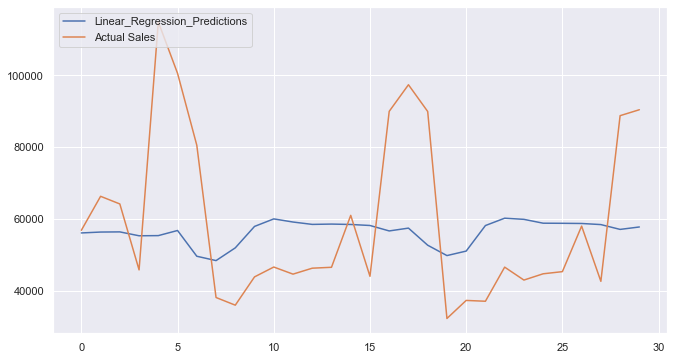

In [13]:
# una vez entrenado, predecimos la parte test
lin_pred=lin_model.predict(X_test)

sbn.set(rc={'figure.figsize':(11, 6)})
#plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [14]:
# utilizamos el error cuadrático medio como medida de error.
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [15]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 23325.026677851878


## Random Forest

Utilizamos el mismo conjunto de datos con las variaciones 
hechas para el modelo de regresión lineal

In [16]:
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [17]:
model.fit(X_train,y_train)
model.score(X_test, y_test)

<ipython-input-17-b2c54ce69eeb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


-0.012033126853076892

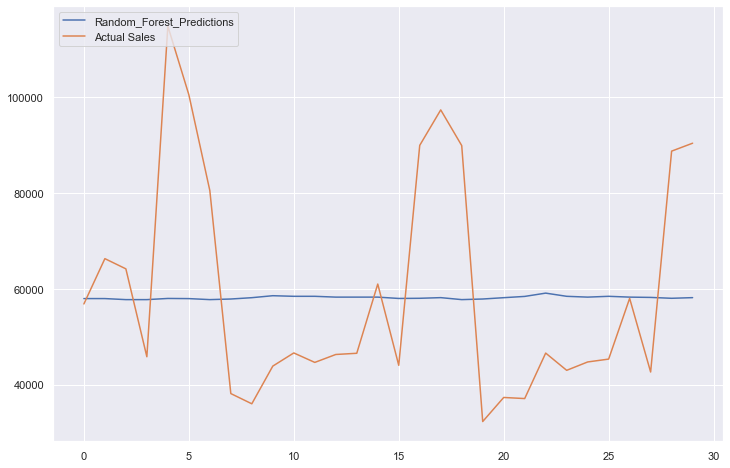

In [18]:
pred=model.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [19]:
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 22992.70805147


# ARIMA

In [20]:
# pip install pmdarima
import pandas as pd
import numpy as np
import datetime

import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#dependencias para desarrollar ARIMA Forecasting Models

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error

In [22]:
df = pd.read_csv('C:/Users/jorge/El Corte Inglés, S.A/Otb y el master - Documentos/VentaMes2017-2019.csv',';',parse_dates=True)

df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df=df.dropna()

#set date as index column. (required in time series)
df = df.set_index('Fecha Venta')

print('Shape of data',df.shape)
print(df.dtypes)
df.head()

Shape of data (36, 1)
Unidades Vendidas    int64
dtype: object


,Unidades Vendidas
Fecha Venta,
2017-01-01,94158
2017-02-01,30152
2017-03-01,38901
2017-04-01,58229
2017-05-01,59880


<AxesSubplot:xlabel='Fecha Venta'>

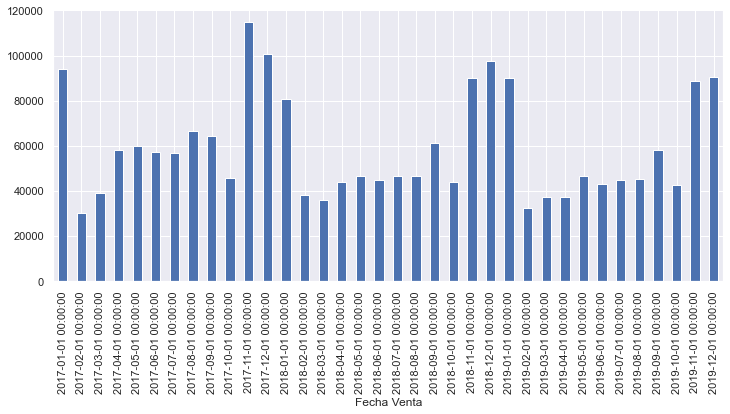

In [23]:
df['Unidades Vendidas'].plot(figsize=(12,5),kind='bar')

#### Chequeamos la estacionalidad

In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF Statistic : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [25]:
adf_test(df['Unidades Vendidas'])

#p-value < 0.05 estacionaria
#p-value > 0.05 no es estacionaria

1. ADF Statistic :  -4.871880118406994
2. P-Value :  3.9546700444868696e-05
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 27
5. Critical Values :
	 1% :  -3.6996079738860943
	 5% :  -2.9764303469999494
	 10% :  -2.627601001371742


#### Resolvemos el orden de modelo ARIMA

In [26]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [27]:
stepwise_fit = auto_arima(df['Unidades Vendidas'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -408.960
Date:                Wed, 19 May 2021   AIC                            823.919
Time:                        10:45:34   BIC                            828.670
Sample:                             0   HQIC                           825.577
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.578e+04   9946.053      3.597      0.000    1.63e+04    5.53e+04
ar.L1          0.4042      0.146      2.777      0.005       0.119       0.689
sigma2       4.11e+08      1.053    3.9e+08      0.000    4.11e+08    4.11e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.79   Prob(JB):                         0.15
Heteroskedasticity (H):               0.59   Skew:                             0.63
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.46e+23. Standard errors may be unstable.
"""

#### Vemos que nuestro modelo tiene orden (1,0,0)

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(36, 1)
(6, 1) (30, 1)
Unidades Vendidas    56861
Name: 2017-07-01 00:00:00, dtype: int64 Unidades Vendidas    90449
Name: 2019-12-01 00:00:00, dtype: int64


## Entrenamos el modelo

In [30]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Unidades Vendidas'],order=(1,0,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Unidades Vendidas   No. Observations:                    6
Model:                     ARMA(1, 0)   Log Likelihood                 -67.628
Method:                       css-mle   S.D. of innovations          18605.041
Date:                Wed, 19 May 2021   AIC                            141.255
Time:                        10:45:34   BIC                            140.631
Sample:                    01-01-2017   HQIC                           138.755
                         - 06-01-2017                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5.411e+04   5767.703      9.381      0.000    4.28e+04    6.54e+04
ar.L1.Unidades Vendidas    -0.4736      0.505     -0.937      0.349      -1.464       0.516
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1117           +0.0000j            2.1117            0.5000
-----------------------------------------------------------------------------
"""

#### Hacemos las predicciones sobre el conjunto test

<AxesSubplot:xlabel='Fecha Venta'>

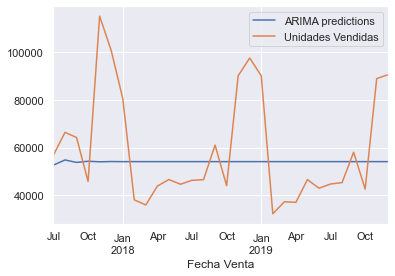

In [31]:
start=len(train)
end=len(train)+len(test)-1
#index_future_dates=pd.date_range(start='2017-01-01',end='2019-12-01')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Unidades Vendidas'].plot(legend=True)

<AxesSubplot:xlabel='Fecha Venta'>

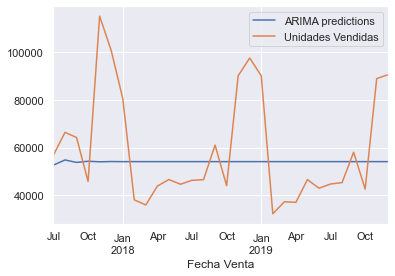

In [32]:
pred.plot(legend='ARIMA Predictions')
test['Unidades Vendidas'].plot(legend=True)

In [33]:
test['Unidades Vendidas'].mean()

59337.2

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Unidades Vendidas']))
print(rmse)

23453.291922637465


In [35]:
model2=ARIMA(df['Unidades Vendidas'],order=(1,0,0))
model2=model2.fit()
df.tail()

,Unidades Vendidas
Fecha Venta,
2019-08-01,45341
2019-09-01,58027
2019-10-01,42642
2019-11-01,88793
2019-12-01,90449


#### Para datos futuros

In [36]:
index_future_dates=pd.date_range(start='2019-01-01',end='2019-01-31')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2019-01-01    72224.959199
2019-01-02    64903.888031
2019-01-03    61962.823334
2019-01-04    60781.321153
2019-01-05    60306.680998
2019-01-06    60116.005703
2019-01-07    60039.406477
2019-01-08    60008.634576
2019-01-09    59996.272704
2019-01-10    59991.306618
2019-01-11    59989.311612
2019-01-12    59988.510166
2019-01-13    59988.188204
2019-01-14    59988.058864
2019-01-15    59988.006905
2019-01-16    59987.986031
2019-01-17    59987.977646
2019-01-18    59987.974277
2019-01-19    59987.972924
2019-01-20    59987.972380
2019-01-21    59987.972162
2019-01-22    59987.972074
2019-01-23    59987.972039
2019-01-24    59987.972025
2019-01-25    59987.972019
2019-01-26    59987.972017
2019-01-27    59987.972016
2019-01-28    59987.972016
2019-01-29    59987.972015
2019-01-30    59987.972015
2019-01-31    59987.972015
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

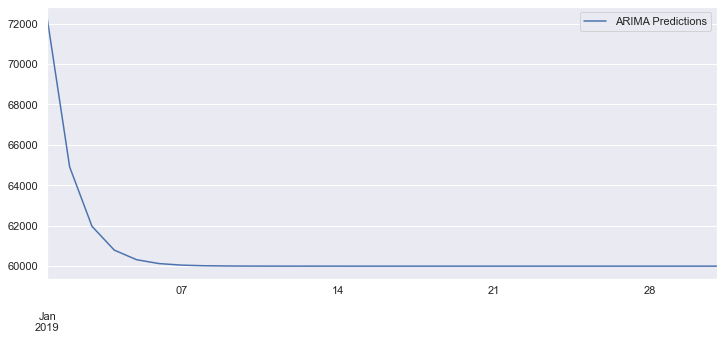

In [37]:
pred.plot(figsize=(12,5),legend=True)

# Prophet

In [1]:
#pip install pystan == 2.19.1.1
#pip install fbprophet
import fbprophet
print('Prophet %s' % fbprophet.__version__)

ModuleNotFoundError: No module named 'prophet'

# XgBoost

¿Cuándo se debe usar XGBoost?

1.Para datasets grandes (más de 1000 observaciones, esto se debe a que el boosting mejora con iteraciones) y que el número de variables sea menor que el número de observaciones.

2.Para problemas con una mezcla de variables categóricas y numéricas, o sólo numéricas (al contrario que la regresión lineal, el KNN o el K-Means, este algoritmo sí que acepta variables categóricas tal cual están).

Nuestro dataset no es muy grande.

In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('C:/Users/jorge/El Corte Inglés, S.A/Otb y el master - Documentos/VentaMes2017-2019.csv',';',parse_dates=True)

df['Fecha Venta'] = pd.to_datetime(df['Fecha Venta'])
df=df.dropna()

#set date as index column. (required in time series)
df = df.set_index('Fecha Venta')

print('Shape of data',df.shape)
print(df.dtypes)
df.head()

Shape of data (36, 1)
Unidades Vendidas    int64
dtype: object


,Unidades Vendidas
Fecha Venta,
2017-01-01,94158
2017-02-01,30152
2017-03-01,38901
2017-04-01,58229
2017-05-01,59880


In [10]:
df['Sale_LastMonth'] = df['Unidades Vendidas'].shift(+1)
df['Sale_2Monthsback'] = df['Unidades Vendidas'].shift(+2)
df['Sale_3Monthsback'] = df['Unidades Vendidas'].shift(+3)

df=df.dropna()
df.head(10)

,Unidades Vendidas,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
Fecha Venta,,,,
2017-07-01,56861,57168.0,59880.0,58229.0
2017-08-01,66329,56861.0,57168.0,59880.0
2017-09-01,64198,66329.0,56861.0,57168.0
2017-10-01,45831,64198.0,66329.0,56861.0
2017-11-01,114898,45831.0,64198.0,66329.0
2017-12-01,100580,114898.0,45831.0,64198.0
2018-01-01,80549,100580.0,114898.0,45831.0
2018-02-01,38136,80549.0,100580.0,114898.0
2018-03-01,36001,38136.0,80549.0,100580.0


In [13]:
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Unidades Vendidas']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)



[[ 57168.  59880.  58229.]
 [ 56861.  57168.  59880.]
 [ 66329.  56861.  57168.]
 [ 64198.  66329.  56861.]
 [ 45831.  64198.  66329.]
 [114898.  45831.  64198.]
 [100580. 114898.  45831.]
 [ 80549. 100580. 114898.]
 [ 38136.  80549. 100580.]
 [ 36001.  38136.  80549.]
 [ 43879.  36001.  38136.]
 [ 46627.  43879.  36001.]
 [ 44648.  46627.  43879.]
 [ 46304.  44648.  46627.]
 [ 46556.  46304.  44648.]
 [ 61019.  46556.  46304.]
 [ 44042.  61019.  46556.]
 [ 89998.  44042.  61019.]
 [ 97409.  89998.  44042.]
 [ 89955.  97409.  89998.]
 [ 32295.  89955.  97409.]
 [ 37323.  32295.  89955.]
 [ 37094.  37323.  32295.]
 [ 46596.  37094.  37323.]
 [ 42994.  46596.  37094.]
 [ 44742.  42994.  46596.]
 [ 45341.  44742.  42994.]
 [ 58027.  45341.  44742.]
 [ 42642.  58027.  45341.]
 [ 88793.  42642.  58027.]]


In [20]:
# Separamos los datos en variables y target

X,y = df.iloc[:, :-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=123)

In [21]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [22]:
# Entrenamos el modelo

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[17:18:56] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
# vemos el acierto del modelo

accuracy_xgb = float(np.sum(preds == y_test))/y_test.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = xg_reg.score(X_test, y_test)
print('Accuracy de Regresion Lineal: ', accuracy_lr)

Accuracy de XGBoost:  0.0
Accuracy de Regresion Lineal:  -1.4217117966947872


In [23]:
# Medida de error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 42572.127682
